In [54]:
"""  The aim of this notebooks is to familiarize my self with structured data, apply and finetuned some ML algorithm.
'Original Tweet' columns in order to achieve the best accuracy """

"  The aim of this notebooks is to familiarize my self with structured data, apply and finetuned some ML algorithm.\n'Original Tweet' columns in order to achieve the best accuracy "

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [56]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

In [57]:
DATA_PATH = "data"
TRAIN_PATH = f"{DATA_PATH}/Corona_NLP_train.csv"
TEST_PATH = f"{DATA_PATH}/Corona_NLP_test.csv"  

In [58]:
train_csv = pd.read_csv(TRAIN_PATH, encoding= 'latin-1')
train_csv.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [59]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [60]:
train_csv.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [69]:
train_csv['TweetAt'] = pd.to_datetime(train_csv['TweetAt'])

/Users/hugo/opt/miniconda3/envs/kaggle_env/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/hugo/opt/miniconda3/envs/kaggle_env/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/hugo/opt/miniconda3/envs/kaggle_env/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/hugo/opt/miniconda3/envs/kaggle_env/lib/python3.9/site-packages/panda

In [61]:
""" UserName and ScreeName are uselss since   
    they are not really interpretable and not generalizable at all"""
useless_columns = ["UserName", "ScreenName"]
train_csv = train_csv.drop(useless_columns, axis= 1)
train_csv.head(5)

,Location,TweetAt,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [62]:
train_csv["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

/Users/hugo/opt/miniconda3/envs/kaggle_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

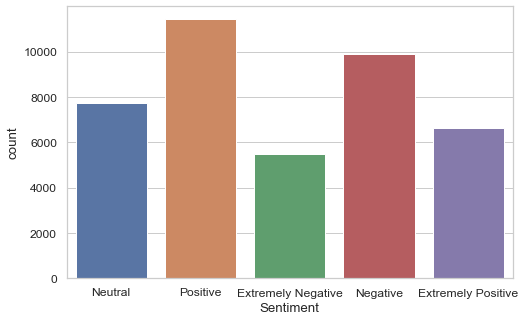

In [63]:
sns.countplot(train_csv["Sentiment"])
# Try to have the same number of samples for each category

In [64]:
print(len(train_csv["TweetAt"].value_counts())) # 30
""" 
Should we drop this columns ? -> Take a look at the corelation between the 'TweetAt' and 'Sentiment
"""

30


" \nShould we drop this columns ? -> Take a look at the corelation between the 'TweetAt' and 'Sentiment\n"

In [65]:
X = train_csv.drop(["Sentiment"], axis = 1)
y = train_csv["Sentiment"]
#y = pd.get_dummies(y)

In [66]:
lb_make = LabelEncoder()    
train_csv["Sentiment"] = lb_make.fit_transform(train_csv["Sentiment"] )
train_csv["Sentiment"] 

0        3
1        4
2        4
3        4
4        0
        ..
41152    3
41153    0
41154    4
41155    3
41156    2
Name: Sentiment, Length: 41157, dtype: int64

In [ ]:
for column in X.columns:
    print(f" Pourcentage of null value of columns {column} is : {round(X[column].isna().sum()/len(X[column]) * 100,3)}")

print(f"mode of location : {X['Location'].mode()[0]}")

 Pourcentage of null value of columns Location is : 20.871
 Pourcentage of null value of columns TweetAt is : 0.0
 Pourcentage of null value of columns OriginalTweet is : 0.0
mode of location : London


In [ ]:
X["Location"].fillna(X["Location"].mode()[0], inplace = True)